In [268]:
import pandas as pd
import matplotlib.pyplot as plt

from nose.tools import *

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import make_scorer

from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from scipy import stats

import seaborn as sns

In [269]:
df = pd.read_csv("C:/Users/Admin/Desktop/Projects for CV/Life Expectancy (Python)/Life Expectancy Data.csv")

In [270]:
df

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,...,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Per_Capita_GDP,Population,Thinness_1-19_Years,Thinness_5-9_Years,Income_Composition_of_Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,1.990711e+10,578.47,34413603.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,2.048489e+10,613.86,33370794.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,2.056107e+10,637.17,32269589.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,2.000160e+10,641.87,31161376.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,1.780429e+10,591.16,30117413.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,7.13,65.0,33.6,5.805598e+09,483.00,12019912.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,6.52,68.0,36.7,5.727592e+09,478.01,11982224.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,6.53,71.0,39.8,6.342116e+09,530.53,11954290.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,6.16,75.0,42.1,6.777385e+09,568.39,11923914.0,1.6,1.7,0.427,9.8


In [271]:
df = df.drop(["Year"], axis = 1)

In [272]:
df

,Country,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,...,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Per_Capita_GDP,Population,Thinness_1-19_Years,Thinness_5-9_Years,Income_Composition_of_Resources,Schooling
0,Afghanistan,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,1.990711e+10,578.47,34413603.0,17.2,17.3,0.479,10.1
1,Afghanistan,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,2.048489e+10,613.86,33370794.0,17.5,17.5,0.476,10.0
2,Afghanistan,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,2.056107e+10,637.17,32269589.0,17.7,17.7,0.470,9.9
3,Afghanistan,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,2.000160e+10,641.87,31161376.0,17.9,18.0,0.463,9.8
4,Afghanistan,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,1.780429e+10,591.16,30117413.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,7.13,65.0,33.6,5.805598e+09,483.00,12019912.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,6.52,68.0,36.7,5.727592e+09,478.01,11982224.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,6.53,71.0,39.8,6.342116e+09,530.53,11954290.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,6.16,75.0,42.1,6.777385e+09,568.39,11923914.0,1.6,1.7,0.427,9.8


In [273]:
df = df.groupby('Country').mean()

In [274]:
df

,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,Under-five_Deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Per_Capita_GDP,Population,Thinness_1-19_Years,Thinness_5-9_Years,Income_Composition_of_Resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,8.252500,52.3125,0.10000,1.242069e+10,418.250714,2.745116e+07,16.58125,15.58125,0.415375,8.21250
Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,5.945625,98.0625,0.10000,9.476655e+09,3218.938750,2.968698e+06,1.61875,1.70000,0.709875,12.13750
Algeria,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,4.604000,91.8750,0.10000,1.339465e+11,3753.730000,3.482137e+07,6.09375,5.97500,0.694875,12.71250
Angola,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,3.919333,47.6875,2.36875,6.940242e+10,2947.288125,2.162286e+07,6.19375,6.66875,0.458375,8.04375
Antigua and Barbuda,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,4.791333,98.3125,0.12500,1.097706e+09,12877.169375,8.480194e+04,3.42500,3.37500,0.488625,8.84375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),73.38750,163.0000,9.3750,7.420000,0.000000,66.250000,165.0000,54.48750,10.7500,74.6875,4.998667,68.5000,0.10000,2.452286e+11,8759.734000,2.739287e+07,1.65000,1.56250,0.726812,12.78750
Viet Nam,74.77500,126.5625,29.1875,3.087333,0.000000,87.538462,4232.9375,11.18750,36.5000,94.9375,5.977333,91.7500,0.14375,9.677662e+10,1098.590000,8.603401e+07,14.92500,15.62500,0.627063,11.51250
Yemen,63.86250,211.8125,39.3750,0.047333,0.000000,55.687500,2761.1875,33.48750,51.6250,67.1250,5.005333,72.6250,0.10000,2.440414e+10,1073.135625,2.173041e+07,13.83125,13.75000,0.475500,8.50625


In [275]:
df.columns

Index(['Life_Expectancy', 'Adult_Mortality', 'Infant_Deaths', 'Alcohol',
       'Percentage_Expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'Under-five_Deaths', 'Polio', 'Total_Expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Per_Capita_GDP', 'Population',
       'Thinness_1-19_Years', 'Thinness_5-9_Years',
       'Income_Composition_of_Resources', 'Schooling'],
      dtype='object')

Text(0, 0.5, 'Life Expectancy')

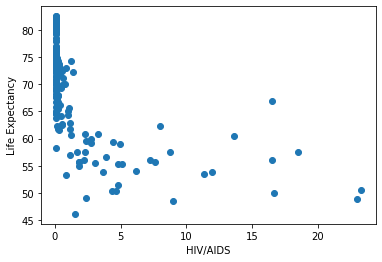

In [276]:
plt.scatter(df['HIV/AIDS'], df['Life_Expectancy'])
plt.xlabel('HIV/AIDS')
plt.ylabel('Life Expectancy')

Text(0, 0.5, 'Life Expectancy')

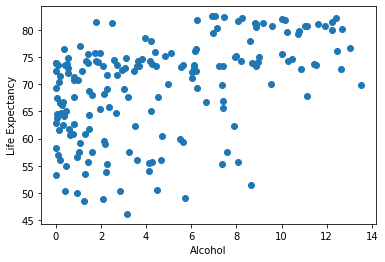

In [277]:
plt.scatter(df['Alcohol'], df['Life_Expectancy'])
plt.xlabel('Alcohol')
plt.ylabel('Life Expectancy')

Text(0, 0.5, 'Life Expectancy')

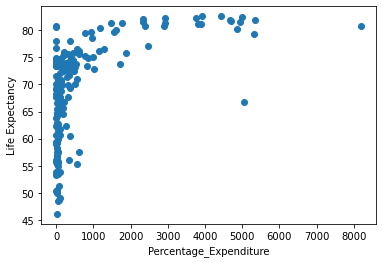

In [278]:
plt.scatter(df['Percentage_Expenditure'], df['Life_Expectancy'])
plt.xlabel('Percentage_Expenditure')
plt.ylabel('Life Expectancy')

Text(0, 0.5, 'Life Expectancy')

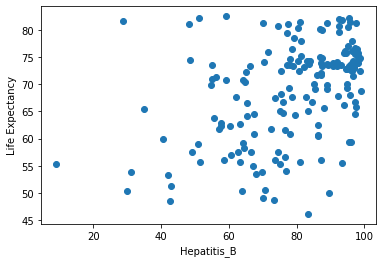

In [279]:
plt.scatter(df['Hepatitis_B'], df['Life_Expectancy'])
plt.xlabel('Hepatitis_B')
plt.ylabel('Life Expectancy')

Text(0, 0.5, 'Life Expectancy')

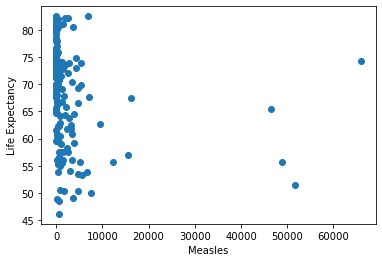

In [280]:
plt.scatter(df['Measles'], df['Life_Expectancy'])
plt.xlabel('Measles')
plt.ylabel('Life Expectancy')

Text(0, 0.5, 'Life Expectancy')

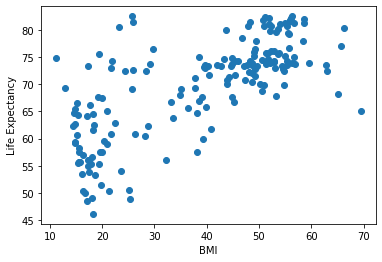

In [281]:
plt.scatter(df['BMI'], df['Life_Expectancy'])
plt.xlabel('BMI')
plt.ylabel('Life Expectancy')

Text(0, 0.5, 'Life Expectancy')

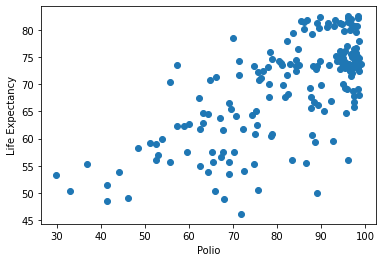

In [282]:
plt.scatter(df['Polio'], df['Life_Expectancy'])
plt.xlabel('Polio')
plt.ylabel('Life Expectancy')

Text(0, 0.5, 'Life Expectancy')

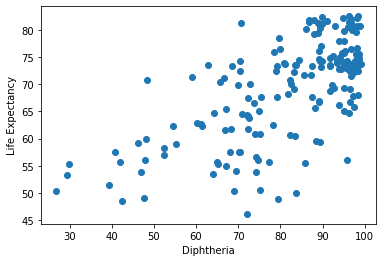

In [283]:
plt.scatter(df['Diphtheria'], df['Life_Expectancy'])
plt.xlabel('Diphtheria')
plt.ylabel('Life Expectancy')

In [284]:
df.corr()

,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,Under-five_Deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Per_Capita_GDP,Population,Thinness_1-19_Years,Thinness_5-9_Years,Income_Composition_of_Resources,Schooling
Life_Expectancy,1.000000,-0.893736,-0.203347,0.458055,0.519940,0.432616,-0.205187,0.722912,-0.229645,0.688256,0.302524,0.678414,-0.587841,0.226833,0.588455,0.021394,-0.520991,-0.512498,0.817090,0.795916
Adult_Mortality,-0.893736,1.000000,0.100986,-0.280231,-0.417048,-0.323163,0.100956,-0.618490,0.121426,-0.536223,-0.199929,-0.513905,0.719173,-0.209590,-0.488089,-0.072818,0.407169,0.409672,-0.647735,-0.603905
Infant_Deaths,-0.203347,0.100986,1.000000,-0.106688,-0.116858,-0.267778,0.712140,-0.273013,0.996968,-0.224675,-0.153946,-0.224870,0.037570,0.097548,-0.126677,0.746816,0.511899,0.514876,-0.163313,-0.177148
Alcohol,0.458055,-0.280231,-0.106688,1.000000,0.468370,0.159652,-0.071730,0.295742,-0.103700,0.337636,0.304346,0.321906,-0.058195,0.206445,0.311466,-0.018279,-0.440364,-0.426593,0.546996,0.603091
Percentage_Expenditure,0.519940,-0.417048,-0.116858,0.468370,1.000000,0.019946,-0.109494,0.296194,-0.120144,0.275194,0.216851,0.257163,-0.076751,0.141404,0.661584,-0.057712,-0.340859,-0.342324,0.578576,0.529492
Hepatitis_B,0.432616,-0.323163,-0.267778,0.159652,0.019946,1.000000,-0.239025,0.182158,-0.280895,0.787404,-0.096022,0.788348,-0.179794,0.004079,0.150907,-0.112950,-0.175538,-0.182873,0.345589,0.487623
Measles,-0.205187,0.100956,0.712140,-0.071730,-0.109494,-0.239025,1.000000,-0.296650,0.720697,-0.223055,-0.158111,-0.241954,0.051409,0.194443,-0.125443,0.750462,0.321128,0.320515,-0.148737,-0.148992
BMI,0.722912,-0.618490,-0.273013,0.295742,0.296194,0.182158,-0.296650,1.000000,-0.285402,0.398735,0.422727,0.389644,-0.335178,0.101163,0.387952,-0.149175,-0.705838,-0.707282,0.658731,0.486668
Under-five_Deaths,-0.229645,0.121426,0.996968,-0.103700,-0.120144,-0.280895,0.720697,-0.285402,1.000000,-0.248597,-0.155908,-0.249977,0.052277,0.084924,-0.130997,0.716724,0.513827,0.515342,-0.183227,-0.191806
Polio,0.688256,-0.536223,-0.224675,0.337636,0.275194,0.787404,-0.223055,0.398735,-0.248597,1.000000,0.072590,0.952608,-0.260702,0.103494,0.323928,-0.010844,-0.323209,-0.315636,0.612396,0.643380


<AxesSubplot:>

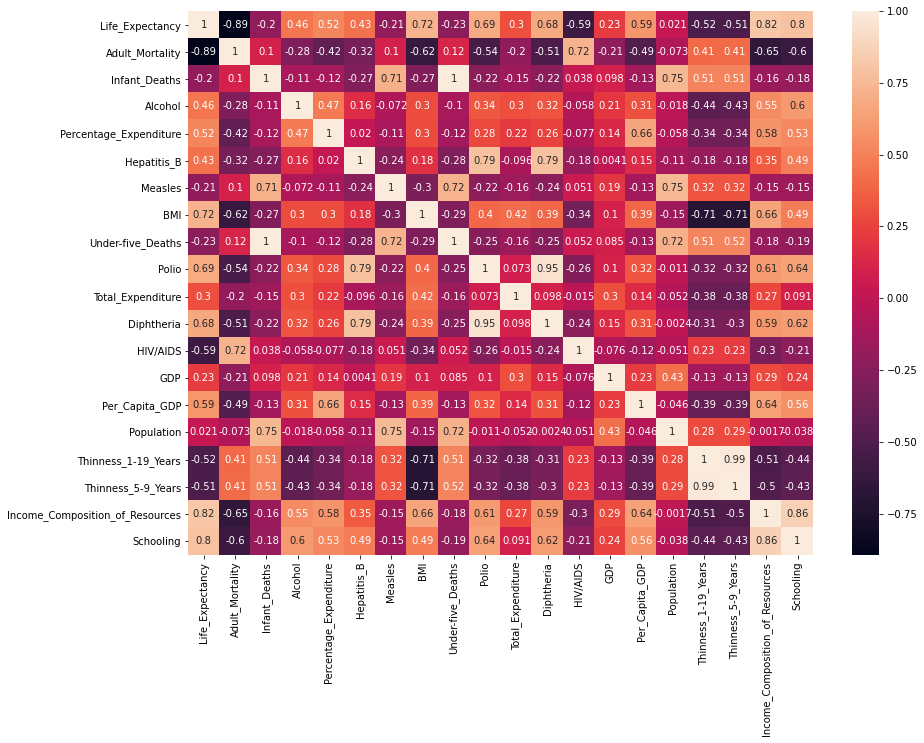

In [285]:
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(), annot=True)

In [286]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(df, threshold):
    col_corr = set() # 'set()' of all the names of correlated columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]     # getting the name of column
                col_corr.add(colname)
    return col_corr            

In [287]:
corr_features = correlation(df, 0.85)
len(set(corr_features))

4

In [288]:
corr_features

{'Diphtheria', 'Schooling', 'Thinness_5-9_Years', 'Under-five_Deaths'}

In [289]:
df.drop(corr_features, axis=1)

,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,Polio,Total_Expenditure,HIV/AIDS,GDP,Per_Capita_GDP,Population,Thinness_1-19_Years,Income_Composition_of_Resources
Country,,,,,,,,,,,,,,,,
Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,48.3750,8.252500,0.10000,1.242069e+10,418.250714,2.745116e+07,16.58125,0.415375
Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,98.1250,5.945625,0.10000,9.476655e+09,3218.938750,2.968698e+06,1.61875,0.709875
Algeria,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,91.7500,4.604000,0.10000,1.339465e+11,3753.730000,3.482137e+07,6.09375,0.694875
Angola,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,46.1250,3.919333,2.36875,6.940242e+10,2947.288125,2.162286e+07,6.19375,0.458375
Antigua and Barbuda,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,96.9375,4.791333,0.12500,1.097706e+09,12877.169375,8.480194e+04,3.42500,0.488625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),73.38750,163.0000,9.3750,7.420000,0.000000,66.250000,165.0000,54.48750,74.6875,4.998667,0.10000,2.452286e+11,8759.734000,2.739287e+07,1.65000,0.726812
Viet Nam,74.77500,126.5625,29.1875,3.087333,0.000000,87.538462,4232.9375,11.18750,94.9375,5.977333,0.14375,9.677662e+10,1098.590000,8.603401e+07,14.92500,0.627063
Yemen,63.86250,211.8125,39.3750,0.047333,0.000000,55.687500,2761.1875,33.48750,67.1250,5.005333,0.10000,2.440414e+10,1073.135625,2.173041e+07,13.83125,0.475500


In [290]:
y = df['Life_Expectancy']

In [291]:
y

Country
Afghanistan                           58.19375
Albania                               75.15625
Algeria                               73.61875
Angola                                49.01875
Antigua and Barbuda                   75.05625
                                        ...   
Venezuela (Bolivarian Republic of)    73.38750
Viet Nam                              74.77500
Yemen                                 63.86250
Zambia                                53.90625
Zimbabwe                              50.48750
Name: Life_Expectancy, Length: 192, dtype: float64

In [292]:
X = df.drop(["Life_Expectancy"], axis=1)

In [293]:
X

,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,Under-five_Deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Per_Capita_GDP,Population,Thinness_1-19_Years,Thinness_5-9_Years,Income_Composition_of_Resources,Schooling
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,8.252500,52.3125,0.10000,1.242069e+10,418.250714,2.745116e+07,16.58125,15.58125,0.415375,8.21250
Albania,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,5.945625,98.0625,0.10000,9.476655e+09,3218.938750,2.968698e+06,1.61875,1.70000,0.709875,12.13750
Algeria,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,4.604000,91.8750,0.10000,1.339465e+11,3753.730000,3.482137e+07,6.09375,5.97500,0.694875,12.71250
Angola,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,3.919333,47.6875,2.36875,6.940242e+10,2947.288125,2.162286e+07,6.19375,6.66875,0.458375,8.04375
Antigua and Barbuda,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,4.791333,98.3125,0.12500,1.097706e+09,12877.169375,8.480194e+04,3.42500,3.37500,0.488625,8.84375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),163.0000,9.3750,7.420000,0.000000,66.250000,165.0000,54.48750,10.7500,74.6875,4.998667,68.5000,0.10000,2.452286e+11,8759.734000,2.739287e+07,1.65000,1.56250,0.726812,12.78750
Viet Nam,126.5625,29.1875,3.087333,0.000000,87.538462,4232.9375,11.18750,36.5000,94.9375,5.977333,91.7500,0.14375,9.677662e+10,1098.590000,8.603401e+07,14.92500,15.62500,0.627063,11.51250
Yemen,211.8125,39.3750,0.047333,0.000000,55.687500,2761.1875,33.48750,51.6250,67.1250,5.005333,72.6250,0.10000,2.440414e+10,1073.135625,2.173041e+07,13.83125,13.75000,0.475500,8.50625


In [294]:
y.isnull().sum()

10

In [295]:
X.isnull().sum()

Adult_Mortality                    10
Infant_Deaths                       0
Alcohol                             2
Percentage_Expenditure              0
Hepatitis_B                         8
Measles                             0
BMI                                 4
Under-five_Deaths                   0
Polio                               0
Total_Expenditure                   2
Diphtheria                          0
HIV/AIDS                            0
GDP                                 4
Per_Capita_GDP                      4
Population                          2
Thinness_1-19_Years                 4
Thinness_5-9_Years                  4
Income_Composition_of_Resources    17
Schooling                          13
dtype: int64

In [296]:
y.fillna(value = y.mean(), inplace = True)

In [297]:
X.fillna(value = X.mean(), inplace = True)

In [298]:
X.isnull().sum()

Adult_Mortality                    0
Infant_Deaths                      0
Alcohol                            0
Percentage_Expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
Under-five_Deaths                  0
Polio                              0
Total_Expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Per_Capita_GDP                     0
Population                         0
Thinness_1-19_Years                0
Thinness_5-9_Years                 0
Income_Composition_of_Resources    0
Schooling                          0
dtype: int64

In [299]:
y.isnull().sum()

0

In [300]:
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [302]:
X_train

array([[0.41700976, 0.04728586, 0.10735999, ..., 0.16582372, 0.38676149,
        0.31815346],
       [0.29255382, 0.01632597, 0.02219366, ..., 0.28327722, 0.37621132,
        0.35558328],
       [0.27220327, 0.        , 0.44743216, ..., 0.23007856, 0.7773523 ,
        0.61540861],
       ...,
       [0.24055993, 1.        , 0.14324551, ..., 1.        , 0.52242888,
        0.49812851],
       [0.27820256, 0.11062331, 0.00434976, ..., 0.13804714, 0.63738668,
        0.57953837],
       [0.39536525, 0.02556363, 0.06005635, ..., 0.27586981, 0.40637699,
        0.46568933]])

In [303]:
X_train.shape

(153, 19)

In [304]:
X_test

array([[3.82778497e-01, 1.14327525e-03, 1.73792694e-01, 1.54542567e-02,
        9.82829670e-01, 3.15717449e-02, 4.21361145e-01, 1.06896552e-03,
        9.84027778e-01, 2.26635314e-01, 9.81944444e-01, 8.67361738e-19,
        4.15759168e-04, 1.08874917e-02, 1.99744757e-03, 8.07870370e-02,
        8.21548822e-02, 6.63175992e-01, 6.32252027e-01],
       [2.28326079e-01, 0.00000000e+00, 5.86229054e-02, 1.36993421e-02,
        7.76098901e-01, 0.00000000e+00, 4.13824604e-01, 0.00000000e+00,
        8.75000000e-01, 2.96323215e-01, 7.37500000e-01, 8.67361738e-19,
        5.08316089e-05, 7.04065443e-03, 3.71953398e-04, 4.23611111e-02,
        4.17508418e-02, 4.35839325e-01, 4.31066750e-01],
       [6.28161393e-02, 6.31087941e-03, 4.79462211e-03, 1.02537276e-01,
        9.75961538e-01, 1.15295518e-02, 6.10383678e-01, 5.51724138e-03,
        9.75694444e-01, 1.46088072e-01, 9.76388889e-01, 8.67361738e-19,
        3.19756450e-02, 9.30819422e-02, 1.95441086e-02, 2.68750000e-01,
        2.61054994e-01

In [305]:
X_test.shape

(39, 19)

In [306]:
# evaluate algorithms
# test options and evaluation metric

num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'r2'

# spot check algorithms

models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [307]:
# evaluate each model in turn 

names = df.columns
scoring = 'r2'
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, y_train, scoring=scoring, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s : %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR : 0.790490 (0.157901)
LASSO : 0.378608 (0.086654)
EN : 0.164115 (0.114737)
KNN : 0.861387 (0.044327)
CART : 0.781326 (0.109231)
SVR : 0.792918 (0.042312)


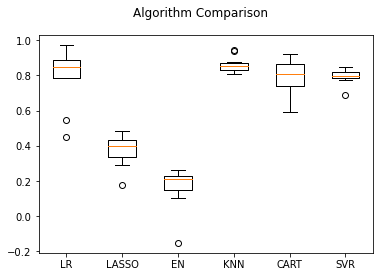

In [308]:
# compare algorithms

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [309]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_train)
print(r2_score(y_train, predictions))

0.9326510396207105


In [310]:
predictions1 = model.predict(X_test)
print(r2_score(y_test, predictions1))

0.8500829360476164
